# <font color = 'red'>Also see L1 Starter Notes committed.</font>

### Question we will answer is : How do daily_engagements (For the first week) look like for students who eventually pass their first project vs students who don't.


We have 3 tables : enrollments, daily_engagement and project submission.
Please exclude rows that have is_udacity = true. They are udacity test accounts and their daily_engagement is not garuanteed to be captured.

Daily_engagements are captured every day for every user irrespective of whether he logs in or not.
For students cancelling on the same day as joining, the daily_engagment will not be captured. Filter them out.

We will be checking the daily_engagemnt of every student for the first week after enrolling. How this first weeks engagemnt affects their first project grading.

Therefore, we will also filter out students who have cancelled their subscriptions in the first week.

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
enrollments = pd.read_csv("enrollments.csv")
enrollments['days_to_cancel'] = pd.to_numeric(enrollments['days_to_cancel'], downcast='unsigned')
enrollments['status'] = enrollments['status'].astype('category')
enrollments['join_date'] = pd.to_datetime(enrollments['join_date'], format="%Y-%m-%d")
enrollments['cancel_date'] = pd.to_datetime(enrollments['cancel_date'], format= "%Y-%m-%d")
enrollments.info()
enrollments.head()
#Unique account ids?
enrollments['account_key'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 7 columns):
account_key       1640 non-null int64
status            1640 non-null category
join_date         1640 non-null datetime64[ns]
cancel_date       988 non-null datetime64[ns]
days_to_cancel    988 non-null float64
is_udacity        1640 non-null bool
is_canceled       1640 non-null bool
dtypes: bool(2), category(1), datetime64[ns](2), float64(1), int64(1)
memory usage: 56.2 KB


1302

In [179]:
enrollments.head(10)
#Why are some students missing from daily_engagement?
#Daily engagement is supposed to be captured for every student every day whether he logs in or not(check unique counts)
#enrollments[enrollments['join_date'] == enrollments['cancel_date']] ?

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,448,canceled,2014-11-10,2015-01-14,65.0,True,True
1,448,canceled,2014-11-05,2014-11-10,5.0,True,True
2,448,canceled,2015-01-27,2015-01-27,0.0,True,True
3,448,canceled,2014-11-10,2014-11-10,0.0,True,True
4,448,current,2015-03-10,NaT,NaN,True,False
5,448,canceled,2015-01-14,2015-01-27,13.0,True,True
6,448,canceled,2015-01-27,2015-03-10,42.0,True,True
7,448,canceled,2015-01-27,2015-01-27,0.0,True,True
8,448,canceled,2015-01-27,2015-01-27,0.0,True,True
9,700,canceled,2014-11-10,2014-11-16,6.0,False,True


In [180]:
dailyEngagement = pd.read_csv("daily_engagement.csv")
dailyEngagement.columns = ['account_key', 'utc_date', 'num_courses_visited', 'total_minutes_visited',
       'lessons_completed', 'projects_completed']
dailyEngagement['utc_date'] = pd.to_datetime(dailyEngagement['utc_date'], format="%Y-%m-%d")
dailyEngagement['num_courses_visited'] = pd.to_numeric(dailyEngagement['num_courses_visited'], downcast='unsigned') 
dailyEngagement['lessons_completed'] = pd.to_numeric(dailyEngagement['lessons_completed'], downcast='unsigned') 
dailyEngagement['projects_completed'] = pd.to_numeric(dailyEngagement['projects_completed'], downcast='unsigned') 
dailyEngagement.info()
dailyEngagement.head()

#Unique account ids?
dailyEngagement.head()
dailyEngagement['account_key'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136240 entries, 0 to 136239
Data columns (total 6 columns):
account_key              136240 non-null int64
utc_date                 136240 non-null datetime64[ns]
num_courses_visited      136240 non-null uint8
total_minutes_visited    136240 non-null float64
lessons_completed        136240 non-null uint8
projects_completed       136240 non-null uint8
dtypes: datetime64[ns](1), float64(1), int64(1), uint8(3)
memory usage: 3.5 MB


1237

In [181]:
#Print one row that is in enrollment but not in daily_engagement
notInDailyEng = ~enrollments['account_key'].isin(dailyEngagement['account_key'])
sameDayCancel = enrollments["join_date"] == enrollments["cancel_date"]
notSameDayCancel = ~sameDayCancel
notInDailyAndNotSameDayCancel = np.logical_and(notInDailyEng, notSameDayCancel)
print(enrollments[notInDailyAndNotSameDayCancel])
#These are udacity test accounts. Filter them out too.

      account_key    status  join_date cancel_date  days_to_cancel  \
467          1304  canceled 2015-01-10  2015-03-10            59.0   
468          1304  canceled 2015-03-10  2015-06-17            99.0   
1378         1101   current 2015-02-25         NaT             NaN   

      is_udacity  is_canceled  
467         True         True  
468         True         True  
1378        True        False  


In [182]:
dailyEngagement.head()

,account_key,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1,11.679374,0,0
1,0,2015-01-10,2,37.284887,0,0
2,0,2015-01-11,2,53.633746,0,0
3,0,2015-01-12,1,33.489270,0,0
4,0,2015-01-13,1,64.779678,0,0


In [183]:

projectSubmissions = pd.read_csv("project_submissions.csv")
projectSubmissions['creation_date'] = pd.to_datetime(projectSubmissions['creation_date'], format="%Y-%m-%d")
projectSubmissions['completion_date'] = pd.to_datetime(projectSubmissions['completion_date'], format="%Y-%m-%d")
projectSubmissions['assigned_rating'] = projectSubmissions['assigned_rating'].astype('category')
projectSubmissions['processing_state'] = projectSubmissions['processing_state'].astype('category')
projectSubmissions.info()
projectSubmissions.head()

#Unique account ids?
projectSubmissions['account_key'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 6 columns):
creation_date       3642 non-null datetime64[ns]
completion_date     3636 non-null datetime64[ns]
assigned_rating     3636 non-null category
account_key         3642 non-null int64
lesson_key          3642 non-null int64
processing_state    3642 non-null category
dtypes: category(2), datetime64[ns](2), int64(2)
memory usage: 121.3 KB


743

In [184]:
projectSubmissions.head()

,creation_date,completion_date,assigned_rating,account_key,lesson_key,processing_state
0,2015-01-14,2015-01-16,UNGRADED,256,3176718735,EVALUATED
1,2015-01-10,2015-01-13,INCOMPLETE,256,3176718735,EVALUATED
2,2015-01-20,2015-01-20,PASSED,256,3176718735,EVALUATED
3,2015-03-10,2015-03-13,PASSED,434,3176718735,EVALUATED
4,2015-02-17,2015-03-03,INCOMPLETE,434,3176718735,EVALUATED


In [185]:
#Find students who have not cancelled their enrollment/or not cancelled within 7 days(Trial period), also exclude udacity test accounts
cancelledAfter7Days = enrollments['days_to_cancel'] > 7

notCancelled = np.isnan(enrollments['days_to_cancel'])

paidStudentSeries = np.logical_or(cancelledAfter7Days, notCancelled)

ExcludeTestSeries = np.logical_and(paidStudentSeries, ~enrollments["is_udacity"])

paidStudents = enrollments[ExcludeTestSeries]

#paidStudents.tail(10)
#paidStudents.info()
#unique students who meet this condition
#paidStudents["account_key"].value_counts()
#paidStudents[paidStudents["account_key"] == 329]
paidStudents["account_key"].nunique()
paidStudents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 10 to 1639
Data columns (total 7 columns):
account_key       1215 non-null int64
status            1215 non-null category
join_date         1215 non-null datetime64[ns]
cancel_date       566 non-null datetime64[ns]
days_to_cancel    566 non-null float64
is_udacity        1215 non-null bool
is_canceled       1215 non-null bool
dtypes: bool(2), category(1), datetime64[ns](2), float64(1), int64(1)
memory usage: 51.1 KB


In [186]:
# Get their most recent enrollments
# First create account_key as the index.
paidStudents = paidStudents.set_index('account_key')
paidStudents = paidStudents.sort_values(by='join_date', ascending=False).groupby(level=0).first()
paidStudents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 1305
Data columns (total 6 columns):
status            995 non-null object
join_date         995 non-null datetime64[ns]
cancel_date       445 non-null datetime64[ns]
days_to_cancel    445 non-null float64
is_udacity        995 non-null bool
is_canceled       995 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(1), object(1)
memory usage: 40.8+ KB


In [187]:
#Create a list of rows from the engagement table including only rows where\n",
# the student is one of the paid students you just found, and the date is within\n",
# one week of the student's join date


#i.e for the particular account key, find all records in the daily engagement table that have a span of 
#7 days from that person joining.

dailyEngagement = dailyEngagement.set_index("account_key")
paidStudentsEngagement = paidStudents.join(dailyEngagement)
paidStudentsEngagement.head(10)

,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
account_key,,,,,,,,,,,
0,current,2015-01-09,NaT,NaN,False,False,2015-01-09,1,11.679374,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-10,2,37.284887,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-11,2,53.633746,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-12,1,33.489270,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-13,1,64.779678,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-14,1,151.617577,1,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-15,1,142.395964,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-16,0,0.000000,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-17,1,9.849562,0,0


In [188]:
#Filter out dates that are > than 7 days of joining
#paidStudentsEngagementForFirst7Days = paidStudentsEngagement[(paidStudentsEngagement["utc_date"] - paidStudentsEngagement["join_date"]).dt.days < 7]


In [189]:
#paidStudentsEngagementForFirst7Days.info()

In [190]:
#paidStudentsEngagementForFirst7Days.head(20)

In [191]:
#Total minutes spent per user = 
#totalMinutesSpentPerUser = paidStudentsEngagementForFirst7Days.groupby("account_key")["total_minutes_visited"].sum()

In [192]:
#totalMinutesSpentPerUser.head()

In [193]:
#Per user stats
#print(np.mean(totalMinutesSpentPerUser))
#print(np.std(totalMinutesSpentPerUser))
#print(np.min(totalMinutesSpentPerUser))
#print(np.max(totalMinutesSpentPerUser))

In [194]:
#Max is 10568 minutes. That is greater than 7 days. So something is wrong here.
#Which student total is that?
#totalMinutesSpentPerUser[totalMinutesSpentPerUser > 10000]

In [195]:
#Account key 108 is flawd. Lets check its daily engagements
#paidStudentsEngagementForFirst7Days.loc[108]

In [196]:
# Also check whether utc_date > join_date :) 
paidStudentsEngagementForFirst7Days = paidStudentsEngagement[(paidStudentsEngagement["utc_date"] - paidStudentsEngagement["join_date"]).dt.days < 7]
#paidStudentsEngagementForFirst7Days = paidStudentsEngagementForFirst7Days[(paidStudentsEngagement["utc_date"] - paidStudentsEngagement["join_date"]).dt.days >= 0]

In [197]:
engagDf = paidStudentsEngagementForFirst7Days[(paidStudentsEngagementForFirst7Days["utc_date"] - paidStudentsEngagementForFirst7Days["join_date"]).dt.days >= 0]

In [198]:
engagDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6919 entries, 0 to 1305
Data columns (total 11 columns):
status                   6919 non-null object
join_date                6919 non-null datetime64[ns]
cancel_date              3114 non-null datetime64[ns]
days_to_cancel           3114 non-null float64
is_udacity               6919 non-null bool
is_canceled              6919 non-null bool
utc_date                 6919 non-null datetime64[ns]
num_courses_visited      6919 non-null uint8
total_minutes_visited    6919 non-null float64
lessons_completed        6919 non-null uint8
projects_completed       6919 non-null uint8
dtypes: bool(2), datetime64[ns](3), float64(2), object(1), uint8(3)
memory usage: 412.2+ KB


In [199]:
engagDf.head(10)

,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
account_key,,,,,,,,,,,
0,current,2015-01-09,NaT,NaN,False,False,2015-01-09,1,11.679374,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-10,2,37.284887,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-11,2,53.633746,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-12,1,33.489270,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-13,1,64.779678,0,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-14,1,151.617577,1,0
0,current,2015-01-09,NaT,NaN,False,False,2015-01-15,1,142.395964,0,0
1,current,2015-05-06,NaT,NaN,False,False,2015-05-06,1,9.640248,0,0
1,current,2015-05-06,NaT,NaN,False,False,2015-05-07,0,0.000000,0,0


In [200]:
#Lessons completed in the first week per student.

lessonsCompletedPerStudentFirstWeek = engagDf.groupby("account_key")["lessons_completed"].sum()

In [201]:
lessonsCompletedPerStudentFirstWeek.head()

account_key
0    1
1    0
2    0
3    0
4    0
Name: lessons_completed, dtype: uint8

In [202]:
#Lesson completed stats
print(np.mean(lessonsCompletedPerStudentFirstWeek))
print(np.std(lessonsCompletedPerStudentFirstWeek))
print(np.min(lessonsCompletedPerStudentFirstWeek))
print(np.max(lessonsCompletedPerStudentFirstWeek))

1.63618090452
3.00256129983
0
36


In [203]:
#Days courses visited
def countDaysVisitedAnyCourse(values):
    count = 0
    for v in values:
        if v > 0:
            count = count + 1
    return count

coursesVisited = engagDf.groupby("account_key")["num_courses_visited"].agg(countDaysVisitedAnyCourse)


In [204]:
coursesVisited.head()

account_key
0    7
1    2
2    0
3    0
4    1
Name: num_courses_visited, dtype: uint8

In [205]:
print(np.mean(coursesVisited))
print(np.std(coursesVisited))
print(np.min(coursesVisited))
print(np.max(coursesVisited))

2.86733668342
2.25519800292
0
7


In [206]:
#Split engagements into 2 parts = engagements of students who eventually pass their first project
#vs those who dont. lesson key for first project = 746169184, 3176718735
#Check projects of students who are in paid daily engagement.
u = engagDf.index.unique()
#Students who passed their projects
p = projectSubmissions["assigned_rating"] == "PASSED"
d = projectSubmissions["assigned_rating"] == "DISTINCTION"
passed = np.logical_or(p, d)
projectSubmissionsPassedFirst = projectSubmissions[passed]
projectSubmissionsPassedFirst = projectSubmissionsPassedFirst[projectSubmissionsPassedFirst["lesson_key"].isin([746169184, 3176718735])]
projectSubmissionsPassedFirst = projectSubmissionsPassedFirst[projectSubmissionsPassedFirst["account_key"].isin(u)]

In [207]:
projectSubmissionsPassedFirst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 2 to 3640
Data columns (total 6 columns):
creation_date       652 non-null datetime64[ns]
completion_date     652 non-null datetime64[ns]
assigned_rating     652 non-null category
account_key         652 non-null int64
lesson_key          652 non-null int64
processing_state    652 non-null category
dtypes: category(2), datetime64[ns](2), int64(2)
memory usage: 27.0 KB


In [208]:
#Students who passed their first projects
studentsPassed = projectSubmissionsPassedFirst["account_key"].unique()
#Students who did not pass their first project
studentsFailed = set(u) - set(studentsPassed)
studentsPassed = list(studentsPassed)
studentsFailed = list(studentsFailed)

In [209]:
len(studentsPassed)

647

In [210]:
len(studentsFailed)

348

In [211]:
passingStudentsEngagement = engagDf.loc[studentsPassed]

In [212]:
failingStudentsEngagement = engagDf.loc[studentsFailed]

In [213]:
passingStudentsEngagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4527 entries, 256 to 623
Data columns (total 11 columns):
status                   4527 non-null object
join_date                4527 non-null datetime64[ns]
cancel_date              1560 non-null datetime64[ns]
days_to_cancel           1560 non-null float64
is_udacity               4527 non-null bool
is_canceled              4527 non-null bool
utc_date                 4527 non-null datetime64[ns]
num_courses_visited      4527 non-null uint8
total_minutes_visited    4527 non-null float64
lessons_completed        4527 non-null uint8
projects_completed       4527 non-null uint8
dtypes: bool(2), datetime64[ns](3), float64(2), object(1), uint8(3)
memory usage: 269.7+ KB


In [214]:
failingStudentsEngagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392 entries, 653 to 1305
Data columns (total 11 columns):
status                   2392 non-null object
join_date                2392 non-null datetime64[ns]
cancel_date              1554 non-null datetime64[ns]
days_to_cancel           1554 non-null float64
is_udacity               2392 non-null bool
is_canceled              2392 non-null bool
utc_date                 2392 non-null datetime64[ns]
num_courses_visited      2392 non-null uint8
total_minutes_visited    2392 non-null float64
lessons_completed        2392 non-null uint8
projects_completed       2392 non-null uint8
dtypes: bool(2), datetime64[ns](3), float64(2), object(1), uint8(3)
memory usage: 142.5+ KB


In [215]:
passingStudentsEngagement.head()

,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
account_key,,,,,,,,,,,
256,canceled,2015-04-01,2015-06-10,70.0,False,True,2015-04-01,0,0.0,0,0
256,canceled,2015-04-01,2015-06-10,70.0,False,True,2015-04-02,0,0.0,0,0
256,canceled,2015-04-01,2015-06-10,70.0,False,True,2015-04-03,0,0.0,0,0
256,canceled,2015-04-01,2015-06-10,70.0,False,True,2015-04-04,0,0.0,0,0
256,canceled,2015-04-01,2015-06-10,70.0,False,True,2015-04-05,0,0.0,0,0


In [216]:
failingStudentsEngagement.head()

,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
account_key,,,,,,,,,,,
653,current,2015-07-08,NaT,NaN,False,False,2015-07-08,0,0.000000,0,0
653,current,2015-07-08,NaT,NaN,False,False,2015-07-09,4,179.408486,2,0
653,current,2015-07-08,NaT,NaN,False,False,2015-07-10,0,0.000000,0,0
653,current,2015-07-08,NaT,NaN,False,False,2015-07-11,4,334.538297,2,0
653,current,2015-07-08,NaT,NaN,False,False,2015-07-12,1,28.581730,0,0


In [217]:
#Some stats
passingStudentsMinutesSpent = passingStudentsEngagement.groupby("account_key")["total_minutes_visited"].sum()
failingStudentsMinutesSpent = failingStudentsEngagement.groupby("account_key")["total_minutes_visited"].sum()

In [218]:
passingStudentsMinutesSpent.head()

account_key
0    494.880496
1     18.576385
2      0.000000
3      0.000000
4     33.321405
Name: total_minutes_visited, dtype: float64

In [219]:
failingStudentsMinutesSpent.head()

account_key
653    736.437165
655    177.836749
656      0.000000
657      0.000000
660    193.848226
Name: total_minutes_visited, dtype: float64

In [220]:
#Some stats
print(np.mean(passingStudentsMinutesSpent))
print(np.mean(failingStudentsMinutesSpent))
print(np.max(passingStudentsMinutesSpent))
print(np.max(failingStudentsMinutesSpent))

394.586046483509
143.3264742667559
3564.7332645
1768.52274933


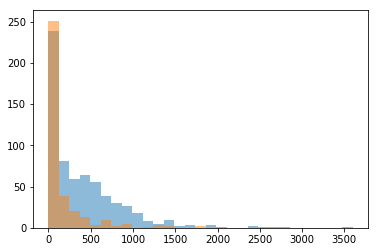

In [233]:
#Plot some graphs
bins = np.linspace(0, 3600, 30)
plt.hist(x=passingStudentsMinutesSpent, bins=bins, alpha = 0.5)
plt.hist(x=failingStudentsMinutesSpent, bins=bins, alpha = 0.5)
plt.show()